# collect data

In [3]:
from bs4 import BeautifulSoup
import urllib.request as ur

In [4]:
#url = 'http://www.politico.com/story/2016/10/2016-presidential-debate-transcript-229519'

In [5]:
url = 'https://www.washingtonpost.com/news/the-fix/wp/2016/09/26/the-first-trump-clinton-presidential-debate-transcript-annotated/'

In [6]:
s = ur.urlopen(url)
sl = s.read()
soup = BeautifulSoup(sl,'html.parser')

In [7]:
print(len(soup.prettify()))

321405


In [8]:
content = soup.get_text()
print(len(content))

154401


In [9]:
print(content[:100])

                                 The first Trump-Clinton presidential debate transcript, annotated -


In [10]:
start = content.find('HOLT')

In [11]:
end = content.find('Good night, everyone.') + len('Good night, everyone.')
print(end)

105445


In [12]:
text = content[start:end+1]
print(len(text))

95214


In [13]:
#import re
#clinton_index = [m.start() for m in re.finditer("CLINTON",text)]
#trump_index = [m.start() for m in re.finditer("TRUMP",text)]
#holt_index = [m.start() for m in re.finditer("HOLT",text)]
# too complex.

In [14]:
# remove punctuation
import string
exclude = set(string.punctuation)
text_noPunc = ''.join(ch for ch in text if ch not in exclude)
print(len(text_noPunc))

90840


In [15]:
text_list = text_noPunc.split()
print(len(text_list))
print(text_list[:100])

17175
['HOLT', 'Good', 'evening', 'from', 'Hofstra', 'University', 'in', 'Hempstead', 'New', 'York', 'Im', 'Lester', 'Holt', 'anchor', 'of', 'NBC', 'Nightly', 'News', 'I', 'want', 'to', 'welcome', 'you', 'to', 'the', 'first', 'presidential', 'debate', 'The', 'participants', 'tonight', 'are', 'Donald', 'Trump', 'and', 'Hillary', 'Clinton', 'This', 'debate', 'is', 'sponsored', 'by', 'the', 'Commission', 'on', 'Presidential', 'Debates', 'a', 'nonpartisan', 'nonprofit', 'organization', 'The', 'commission', 'drafted', 'tonights', 'format', 'and', 'the', 'rules', 'have', 'been', 'agreed', 'to', 'by', 'the', 'campaigns', 'The', '90minute', 'debate', 'is', 'divided', 'into', 'six', 'segments', 'each', '15', 'minutes', 'long', 'Well', 'explore', 'three', 'topic', 'areas', 'tonight', 'Achieving', 'prosperity', 'Americas', 'direction', 'and', 'securing', 'America', 'At', 'the', 'start', 'of', 'each', 'segment', 'I', 'will', 'ask']


In [16]:
# sublist = []
# i = 0
# while i < len(text_list)-1:
#     start = i 
#     end = 0 
#     for j in range(start+1,len(text_list)):
#         if text_list[j] in ("CLINTON",'TRUMP','HOLT'):
#             i = j 
#             end = j 
#             sub = text_list[start:end]
#             sublist.append(sub)
#             break
#         i +=1  
# print(len(sublist))

# split data into 3 groups 

In [17]:
index_list = []
for i in range(len(text_list)):
    if text_list[i] in ("CLINTON",'TRUMP','HOLT'):
        index_list.append(i)
print(len(index_list))

320


In [18]:
from collections import defaultdict
result_dict = defaultdict(list)
for index in range(len(index_list)-1):
    value = text_list[index_list[index]+1:index_list[index+1]]
    result_dict[text_list[index_list[index]]].append(value)
print(len(result_dict))

3


# analyse Clinton's debate

In [19]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

## text input

In [107]:
clinton = [item.lower() for sublist in result_dict['CLINTON'] for item in sublist]
clinton_text = ' '.join(clinton)

In [109]:
print(clinton_text[0:100])

how are you donald applause well thank you lester and thanks to hofstra for hosting us the central q


## list of sentence input

In [157]:
clinton_list = [' '.join(s) for s in result_dict['CLINTON']]

In [161]:
print(clinton_list[0:2])

['How are you Donald APPLAUSE', 'Well thank you Lester and thanks to Hofstra for hosting us The central question in this election is really what kind of country we want to be and what kind of future well build together Today is my granddaughters second birthday so I think about this a lot First we have to build an economy that works for everyone not just those at the top That means we need new jobs good jobs with rising incomes I want us to invest in you I want us to invest in your future That means jobs in infrastructure in advanced manufacturing innovation and technology clean renewable energy and small business because most of the new jobs will come from small business We also have to make the economy fairer That starts with raising the national minimum wage and also guarantee finally equal pay for womens work']


# countvectorizer 

In [131]:
cvec = CountVectorizer(stop_words='english',ngram_range=(1,1))

In [167]:
c = cvec.fit_transform(clinton_list)
print(c.shape)

(94, 1191)


In [165]:
vocab = cvec.vocabulary_
reversed_vocab = dict((v,k) for (k,v) in vocab.items())

In [166]:
topwords= set()
for i in range(c.shape[0]):
    sublist = c[i,:].todense()
    sorted_sublist = np.argsort(sublist).tolist()[0]
    topword_index = sorted_sublist[0:100]
    for index in topword_index:
        topwords.add(reversed_vocab[index])
        #print(len(topwords))
print(topwords)

{'organizations', 'remedy', 'particularly', 'profits', 'opportunities', 'owes', 'raqqa', 'overseas', 'regulations', 'opinion', 'recently', 'racism', 'reasons', 'king', 'population', 'remains', 'releasing', 'rate', 'perfect', 'permit', 'page', 'publicsector', 'outgunned', 'racial', 'onehalf', 'provoked', 'plant', 'policing', 'plan', 'quickly', 'questioning', 'priority', 'piggy', 'oh', 'question', 'recognize', 'paints', 'plans', 'reality', 'persisted', 'preparing', 'power', 'position', 'positive', 'political', 'profit', 'praiseworthy', 'record', 'produce', 'picture', 'organizing', 'provide', 'pulled', 'raise', 'obviously', 'quite', 'numberone', 'rallies', 'racist', 'prison', 'reason', 'precipice', 'release', 'pushed', 'really', 'refinance', 'point', 'questions', 'reform', 'places', 'pick', 'nuclear', 'recession', 'recent', '10', 'platform', 'reassure', 'order', 'organs', 'qaida', 'playing', 'policy', 'profitsharing', 'penny', 'offer', 'pay', 'problem', 'ok', 'programs', 'relieved', 'prep

# TFIDF

In [168]:
tfidfvec = TfidfVectorizer(stop_words='english',ngram_range=(1,1))

In [169]:
tfidf = tfidfvec.fit_transform(clinton_list)
print(tfidf.shape)

(94, 1191)


In [171]:
vocab = tfidfvec.vocabulary_
reversed_vocab = dict((v,k) for (k,v) in vocab.items())

In [172]:
topwords= set()
for i in range(tfidf.shape[0]):
    sublist = tfidf[i,:].todense()
    sorted_sublist = np.argsort(sublist).tolist()[0]
    topword_index = sorted_sublist[0:100]
    for index in topword_index:
        topwords.add(reversed_vocab[index])
        #print(len(topwords))
print(topwords)

{'organizations', 'remedy', 'particularly', 'profits', 'opportunities', 'owes', 'raqqa', 'overseas', 'regulations', 'opinion', 'recently', 'racism', 'reasons', 'king', 'population', 'remains', 'releasing', 'rate', 'perfect', 'permit', 'page', 'publicsector', 'outgunned', 'racial', 'onehalf', 'provoked', 'plant', 'policing', 'plan', 'quickly', 'questioning', 'priority', 'piggy', 'oh', 'question', 'recognize', 'paints', 'plans', 'reality', 'persisted', 'preparing', 'power', 'position', 'positive', 'political', 'profit', 'praiseworthy', 'record', 'produce', 'picture', 'organizing', 'provide', 'pulled', 'raise', 'obviously', 'quite', 'numberone', 'rallies', 'racist', 'prison', 'reason', 'precipice', 'release', 'pushed', 'really', 'refinance', 'point', 'questions', 'reform', 'places', 'pick', 'nuclear', 'recession', 'recent', '10', 'platform', 'reassure', 'order', 'organs', 'qaida', 'playing', 'policy', 'profitsharing', 'penny', 'offer', 'pay', 'problem', 'ok', 'programs', 'relieved', 'prep

# count frequency 

In [145]:
ranked_tuple= list(zip(cvec.get_feature_names(),
    np.asarray(c.sum(axis=0)).ravel()))
ranked_result= sorted(ranked_tuple, key=lambda x: x[1],reverse=True)

In [146]:
print(ranked_result)

[('think', 39), ('people', 33), ('know', 28), ('going', 27), ('donald', 26), ('need', 23), ('thats', 22), ('really', 20), ('want', 20), ('lot', 18), ('said', 18), ('good', 17), ('jobs', 17), ('weve', 17), ('country', 16), ('just', 16), ('make', 16), ('tax', 16), ('business', 15), ('got', 15), ('work', 15), ('new', 14), ('economy', 13), ('american', 11), ('hes', 11), ('ive', 11), ('nuclear', 11), ('police', 11), ('actually', 10), ('communities', 10), ('dont', 10), ('important', 10), ('kind', 10), ('look', 10), ('million', 10), ('deal', 9), ('did', 9), ('information', 9), ('say', 9), ('debt', 8), ('fact', 8), ('iran', 8), ('isis', 8), ('lets', 8), ('plan', 8), ('president', 8), ('support', 8), ('talk', 8), ('things', 8), ('wealthy', 8), ('working', 8), ('years', 8), ('called', 7), ('home', 7), ('im', 7), ('justice', 7), ('lester', 7), ('middle', 7), ('paid', 7), ('pay', 7), ('proposed', 7), ('state', 7), ('states', 7), ('trade', 7), ('world', 7), ('young', 7), ('able', 6), ('better', 6),

# wordcloud

In [26]:
from wordcloud import WordCloud
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [27]:
wordcloud = WordCloud().generate(clinton_text)

(-0.5, 399.5, 199.5, -0.5)

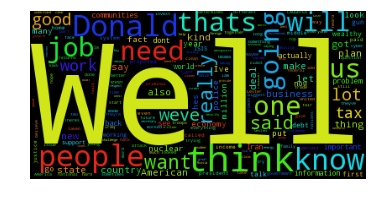

In [28]:
plt.imshow(wordcloud)
plt.axis("off")

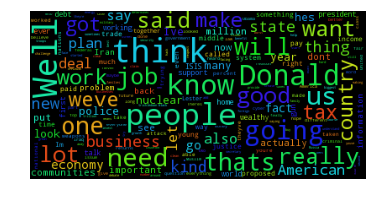

In [29]:
wordcloud = WordCloud(max_font_size=40, relative_scaling=.5).generate(clinton_text)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()